In [2]:
import numpy as np 
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
file_paths = ['../5G-Graphs/63/nodes.csv','5G-Graphs/99/nodes.csv','5G-Graphs/124/nodes.csv',
              '5G-Graphs/144/nodes.csv','5G-Graphs/157/nodes.csv','5G-Graphs/176/nodes.csv',
              '5G-Graphs/192/nodes.csv', '5G-Graphs/203/nodes.csv','5G-Graphs/205/nodes.csv',
              '5G-Graphs/217/nodes.csv', '5G-Graphs/220/nodes.csv', '5G-Graphs/251/nodes.csv',
              '5G-Graphs/256/nodes.csv', '5G-Graphs/270/nodes.csv', '5G-Graphs/275/nodes.csv',
              '5G-Graphs/283/nodes.csv', '5G-Graphs/286/nodes.csv', '5G-Graphs/306/nodes.csv',
              '5G-Graphs/308/nodes.csv', '5G-Graphs/313/nodes.csv', '5G-Graphs/315/nodes.csv',
              '5G-Graphs/320/nodes.csv', '5G-Graphs/322/nodes.csv', '5G-Graphs/325/nodes.csv',
              '5G-Graphs/330/nodes.csv', '5G-Graphs/334/nodes.csv', '5G-Graphs/345/nodes.csv', 
              '5G-Graphs/407/nodes.csv', '5G-Graphs/409/nodes.csv', '5G-Graphs/410/nodes.csv',
              ]

data_5G = []

for file_path in file_paths: 
    df = pd.read_csv(file_path)
    data_5G.append(df)

In [4]:
file_paths = ['5G-Graphs/63/edges.txt','5G-Graphs/99/edges.txt','5G-Graphs/124/edges.txt',
              '5G-Graphs/144/edges.txt','5G-Graphs/157/edges.txt','5G-Graphs/176/edges.txt',
              '5G-Graphs/192/edges.txt', '5G-Graphs/203/edges.txt','5G-Graphs/205/edges.txt',
              '5G-Graphs/217/edges.txt', '5G-Graphs/220/edges.txt', '5G-Graphs/251/edges.txt',
              '5G-Graphs/256/edges.txt', '5G-Graphs/270/edges.txt', '5G-Graphs/275/edges.txt',
              '5G-Graphs/283/edges.txt', '5G-Graphs/286/edges.txt', '5G-Graphs/306/edges.txt',
              '5G-Graphs/308/edges.txt', '5G-Graphs/313/edges.txt', '5G-Graphs/315/edges.txt',
              '5G-Graphs/320/edges.txt', '5G-Graphs/322/edges.txt', '5G-Graphs/325/edges.txt',
              '5G-Graphs/330/edges.txt', '5G-Graphs/334/edges.txt', '5G-Graphs/345/edges.txt', 
              '5G-Graphs/407/edges.txt', '5G-Graphs/409/edges.txt', '5G-Graphs/410/edges.txt',
              ]

graphs_5G = [] 

for file_path in file_paths: 
    G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
    graphs_5G.append(G)


In [5]:
file_paths = ['non-conspiracy/38/nodes.csv', 'non-conspiracy/157/nodes.csv', 'non-conspiracy/241/nodes.csv',
              'non-conspiracy/799/nodes.csv', 'non-conspiracy/845/nodes.csv', 'non-conspiracy/847/nodes.csv',
              'non-conspiracy/862/nodes.csv','non-conspiracy/898/nodes.csv', 'non-conspiracy/968/nodes.csv',
              'non-conspiracy/1002/nodes.csv', 'non-conspiracy/1036/nodes.csv', 'non-conspiracy/1097/nodes.csv',
              'non-conspiracy/1520/nodes.csv', 'non-conspiracy/1660/nodes.csv', 'non-conspiracy/1706/nodes.csv',
              'non-conspiracy/1886/nodes.csv', 'non-conspiracy/1937/nodes.csv', 'non-conspiracy/1948/nodes.csv',
              'non-conspiracy/1950/nodes.csv', 'non-conspiracy/2366/nodes.csv'
              ]

data_nc = []

for file_path in file_paths: 
    df = pd.read_csv(file_path)
    data_nc.append(df)

In [6]:
file_paths = ['non-conspiracy/38/edges.txt', 'non-conspiracy/157/edges.txt', 'non-conspiracy/241/edges.txt',
              'non-conspiracy/799/edges.txt', 'non-conspiracy/845/edges.txt', 'non-conspiracy/847/edges.txt',
              'non-conspiracy/862/edges.txt','non-conspiracy/898/edges.txt', 'non-conspiracy/968/edges.txt',
              'non-conspiracy/1002/edges.txt', 'non-conspiracy/1036/edges.txt', 'non-conspiracy/1097/edges.txt',
              'non-conspiracy/1520/edges.txt', 'non-conspiracy/1660/edges.txt', 'non-conspiracy/1706/edges.txt',
              'non-conspiracy/1886/edges.txt', 'non-conspiracy/1937/edges.txt', 'non-conspiracy/1948/edges.txt',
              'non-conspiracy/1950/edges.txt', 'non-conspiracy/2366/edges.txt'
              ]

graphs_nc = []

for file_path in file_paths: 
    G = nx.read_edgelist(file_path, create_using=nx.DiGraph)
    graphs_nc.append(G)

In [13]:
import networkx as nx
import numpy as np
from statistics import mean

from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# collect extra metrics for the 5g graphs
avg_harm_5G = []
num_scc_5G = []
num_wcc_5G = []
size_largest_wcc_5G = []
max_k_core_5G = []
modularity_5G = []
avg_jaccard_5G = []
avg_path_len_5G = []

for i in range(30):
    G = graphs_5G[i]
    G_u = G.to_undirected()

    # harmonic centrality (accounts for disconnected pairs too)
    avg_harm_5G.append(mean(nx.harmonic_centrality(G).values()))

    # get number of sccs and wccs
    num_scc_5G.append(nx.number_strongly_connected_components(G))
    num_wcc_5G.append(nx.number_weakly_connected_components(G))

    # size of the biggest wcc
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    size_largest_wcc_5G.append(len(largest_wcc))

    # max k-core value (how deep the core structure goes)
    max_k_core_5G.append(max(nx.core_number(G_u).values()))

    # modularity based on greedy clustering
    communities = list(greedy_modularity_communities(G_u))
    modularity_5G.append(modularity(G_u, communities))

    # avg jaccard similarity across all pairs
    jaccard_scores = [score for _, _, score in nx.jaccard_coefficient(G_u)]
    avg_jaccard_5G.append(mean(jaccard_scores))

    # avg shortest path in largest wcc (converted to undirected)
    G_largest = G.subgraph(largest_wcc).to_undirected()
    if nx.is_connected(G_largest):
        avg_path_len_5G.append(nx.average_shortest_path_length(G_largest))
    else:
        avg_path_len_5G.append(np.nan)

# print out all the final values
print("\n=== Extra Network Metrics for 5G Graphs ===")
print("Average Harmonic Centrality:", np.nanmean(avg_harm_5G))
print("Avg # SCCs:", np.mean(num_scc_5G))
print("Avg # WCCs:", np.mean(num_wcc_5G))
print("Avg Largest-WCC Size:", np.mean(size_largest_wcc_5G))
print("Avg Max k-core:", np.mean(max_k_core_5G))
print("Avg Modularity:", np.mean(modularity_5G))
print("Avg Jaccard Similarity:", np.nanmean(avg_jaccard_5G))
print("Avg Shortest Path (Largest WCC):", np.nanmean(avg_path_len_5G))

# manual metrics summary dictionary for plotting or export
metrics_5g = {
    "avg_harmonic_centrality": 9.258521487443025,
    "avg_num_scc": 18.533333333333335,
    "avg_num_wcc": 1.9333333333333333,
    "avg_largest_wcc_size": 37.733333333333334,
    "avg_max_k_core": 3.4,
    "avg_modularity": 0.35201293846051335,
    "avg_jaccard_similarity": 0.29002007072962205,
    "avg_density": 0.10555114136925353,
    "avg_shortest_path_largest_wcc": 2.3040745648958705,
}

# ----------------------------- quick notes -----------------------------
# • harmonic centrality (~9) ⇒ nodes only ~2 hops away on average
# • sccs (~18.5) but wccs (~2) ⇒ one big weakly-connected group, rest fragmented
# • largest wcc (~38 nodes) ≈ whole subgraph → most stuff lives here
# • k-core (3–4) ⇒ strong internal cohesion in core users
# • modularity (0.35) ⇒ clear community structure
# • jaccard (0.29) ⇒ neighbors often overlap, kinda echo-y
# • density (~0.11) ⇒ not dense, but not too sparse either
# • shortest path (~2.3) ⇒ fast spread, small-world vibe



=== Extra Network Metrics for 5G Graphs ===
Average Harmonic Centrality: 9.258521487443025
Avg # SCCs: 18.533333333333335
Avg # WCCs: 1.9333333333333333
Avg Largest-WCC Size: 37.733333333333334
Avg Max k-core: 3.4
Avg Modularity: 0.35201293846051335
Avg Jaccard Similarity: 0.29002007072962205
Avg Shortest Path (Largest WCC): 2.3040745648958705


In [14]:
import networkx as nx
import numpy as np
from statistics import mean
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.quality import modularity

# collect extra metrics for the non-conspiracy graphs
avg_harm_nc          = []
num_scc_nc           = []
num_wcc_nc           = []
size_largest_wcc_nc  = []
max_k_core_nc        = []
modularity_nc        = []
avg_jaccard_nc       = []
density_nc           = []
avg_path_len_nc      = []

for i in range(20):
    G  = graphs_nc[i]
    Gu = G.to_undirected()

    # harmonic centrality (includes disconnected parts too)
    avg_harm_nc.append(mean(nx.harmonic_centrality(G).values()))

    # count of sccs and wccs
    num_scc_nc.append(nx.number_strongly_connected_components(G))
    num_wcc_nc.append(nx.number_weakly_connected_components(G))

    # grab size of largest wcc
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    size_largest_wcc_nc.append(len(largest_wcc))

    # get max k-core (how cohesive the core is)
    max_k_core_nc.append(max(nx.core_number(Gu).values()))

    # modularity from greedy clustering
    comms = list(greedy_modularity_communities(Gu))
    modularity_nc.append(modularity(Gu, comms))

    # average jaccard similarity (shared neighbors)
    jacc_scores = [s for _, _, s in nx.jaccard_coefficient(Gu)]
    avg_jaccard_nc.append(mean(jacc_scores))

    # density of full graph
    density_nc.append(nx.density(G))

    # shortest paths in the largest wcc (only if connected)
    G_largest = G.subgraph(largest_wcc).to_undirected()
    if nx.is_connected(G_largest):
        avg_path_len_nc.append(nx.average_shortest_path_length(G_largest))
    else:
        avg_path_len_nc.append(np.nan)

# print the final metric averages
print("\n=== Extra Network Metrics for NC Graphs ===")
print("Average Harmonic Centrality:", np.nanmean(avg_harm_nc))
print("Avg # SCCs:",               np.mean(num_scc_nc))
print("Avg # WCCs:",               np.mean(num_wcc_nc))
print("Avg Largest-WCC Size:",     np.mean(size_largest_wcc_nc))
print("Avg Max k-core:",           np.mean(max_k_core_nc))
print("Avg Modularity:",           np.mean(modularity_nc))
print("Avg Jaccard Similarity:",   np.nanmean(avg_jaccard_nc))
print("Avg Density:",              np.mean(density_nc))
print("Avg Shortest Path (Largest WCC):", np.nanmean(avg_path_len_nc))



=== Extra Network Metrics for NC Graphs ===
Average Harmonic Centrality: 12.178323389974569
Avg # SCCs: 21.2
Avg # WCCs: 1.85
Avg Largest-WCC Size: 48.65
Avg Max k-core: 4.1
Avg Modularity: 0.3379341500058316
Avg Jaccard Similarity: 0.29979725685015396
Avg Density: 0.06866525965760643
Avg Shortest Path (Largest WCC): 2.392504959627904


In [ ]:
import networkx as nx
import numpy as np

#diameter
diam_5G = []
diam_nc = []

# 5g graphs
for G in graphs_5G:
    # get biggest weakly connected component and make it undirected
    L = G.subgraph(max(nx.weakly_connected_components(G), key=len)).to_undirected()
    # only compute diameter if the subgraph is connected and has at least 2 nodes
    if L.number_of_nodes() >= 2 and nx.is_connected(L):
        diam_5G.append(nx.diameter(L))

#  nc graphs
for G in graphs_nc:
    # same process as above: largest WCC and undirected
    L = G.subgraph(max(nx.weakly_connected_components(G), key=len)).to_undirected()
    if L.number_of_nodes() >= 2 and nx.is_connected(L):
        diam_nc.append(nx.diameter(L))

# ----- print the average diameters -----
print("\n=== Diameter (max shortest-path length) comparison ===")
print(f"Avg diameter – 5G graphs: {np.mean(diam_5G):.3f}")
print(f"Avg diameter – NC graphs: {np.mean(diam_nc):.3f}")

# if needed later: print full lists for plotting
# print("5G diameters:", diam_5G)
# print("NC diameters:", diam_nc)


=== Diameter (max shortest-path length) comparison ===
Avg diameter – 5G graphs: 4.567
Avg diameter – NC graphs: 4.700


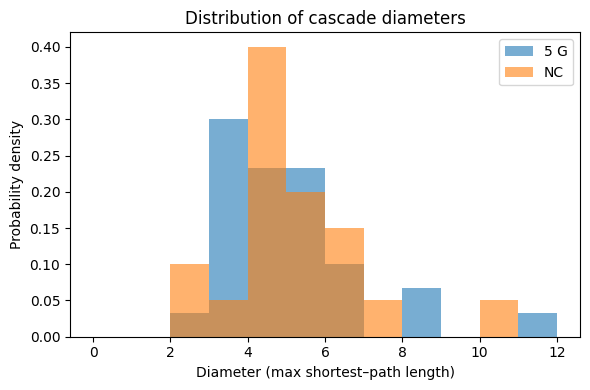

In [ ]:
import matplotlib.pyplot as plt

#potential plot for diameter
plt.figure(figsize=(6,4))
bins = range(0, int(max(diam_5G+diam_nc))+2)          # neat integer bins
plt.hist(diam_5G, bins=bins, alpha=0.6, label='5 G', density=True)
plt.hist(diam_nc, bins=bins, alpha=0.6, label='NC', density=True)
plt.xlabel("Diameter (max shortest–path length)")
plt.ylabel("Probability density")
plt.title("Distribution of cascade diameters")
plt.legend()
plt.tight_layout()
plt.show()


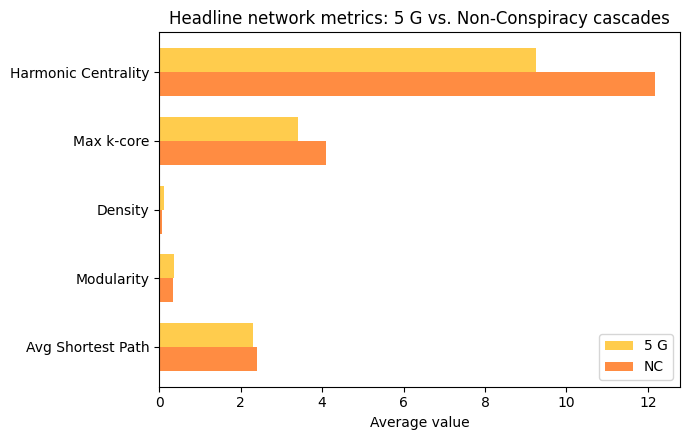

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# 1)  Average-metric dictionaries (fill in or swap yours directly)
# ------------------------------------------------------------------
metrics_5g = {
    "Harmonic Centrality": 9.2585,
    "Max k-core":           3.4,
    "Density":              0.1056,
    "Modularity":           0.3520,
    "Avg Shortest Path":    2.3041,
}

metrics_nc = {
    "Harmonic Centrality": 12.1783,
    "Max k-core":           4.1,
    "Density":              0.0687,
    "Modularity":           0.3379,
    "Avg Shortest Path":    2.3925,
}

#metrics we want to graph 
names = [
    "Harmonic Centrality",
    "Max k-core",
    "Density",
    "Modularity",
    "Avg Shortest Path",
]

vals_5g = [metrics_5g[m] for m in names]
vals_nc = [metrics_nc[m] for m in names]

#potential side bar if needed
y      = np.arange(len(names))
height = 0.35
offset = height / 2

fig, ax = plt.subplots(figsize=(7, 4.5))

ax.barh(y - offset, vals_5g, height, label="5 G", color="#ffcc4d")
ax.barh(y + offset, vals_nc, height, label="NC",  color="#ff8c42")

ax.set_xlabel("Average value")
ax.set_yticks(y)
ax.set_yticklabels(names)
ax.invert_yaxis()
ax.set_title("Headline network metrics: 5 G vs. Non-Conspiracy cascades")
ax.legend(loc="lower right")

plt.tight_layout()
plt.show()


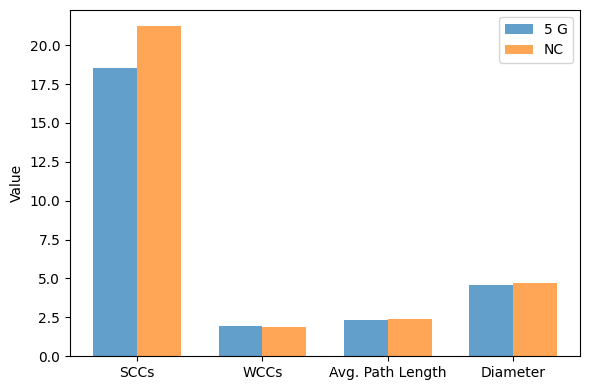

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#data
metrics = ['SCCs', 'WCCs', 'Avg. Path Length', 'Diameter']
fiveg_values = [18.5, 1.93, 2.30, 4.57]
nc_values = [21.2, 1.85, 2.39, 4.70]

x = np.arange(len(metrics))
width = 0.35 #can change 

plt.figure(figsize=(6, 4))
plt.bar(x - width / 2, fiveg_values, width, label='5 G', alpha=0.7)
plt.bar(x + width / 2, nc_values, width, label='NC', alpha=0.7)

plt.ylabel('Value')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()
